# K-means Clustering

In [2]:
import numpy as np

In [ ]:
X = np.zeros((150,2))

In [ ]:
X

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.

In [ ]:
np.random.seed(seed=42)

In [ ]:
X[:50,0] = np.random.normal(loc=0.0, scale=0.3, size=50)

In [ ]:
X[:50,1] = np.random.normal(loc=0.0, scale=0.3, size=50)

In [ ]:
X[50:100,0] = np.random.normal(loc=2.0, scale=0.2, size=50)
X[50:100,1] = np.random.normal(loc=0.0, scale=0.5, size=50)

In [ ]:
X[100:150,0] = np.random.normal(loc=-1.0, scale=0.2, size=50)
X[100:150,1] = np.random.normal(loc=2.0, scale=0.5, size=50)

In [ ]:
X

array([[ 1.49014246e-01,  9.72251908e-02],
       [-4.14792904e-02, -1.15524684e-01],
       [ 1.94306561e-01, -2.03076600e-01],
       [ 4.56908957e-01,  1.83502887e-01],
       [-7.02460124e-02,  3.09299857e-01],
       [-7.02410871e-02,  2.79384036e-01],
       [ 4.73763845e-01, -2.51765257e-01],
       [ 2.30230419e-01, -9.27637128e-02],
       [-1.40842316e-01,  9.93790294e-02],
       [ 1.62768013e-01,  2.92663538e-01],
       [-1.39025308e-01, -1.43752271e-01],
       [-1.39718926e-01, -5.56976930e-02],
       [ 7.25886815e-02, -3.31900492e-01],
       [-5.73984073e-01, -3.58861987e-01],
       [-5.17475350e-01,  2.43757747e-01],
       [-1.68686259e-01,  4.06872009e-01],
       [-3.03849336e-01, -2.16030365e-02],
       [ 9.42741998e-02,  3.01059869e-01],
       [-2.72407223e-01,  1.08490808e-01],
       [-4.23691110e-01, -1.93535926e-01],
       [ 4.39694631e-01,  1.08418682e-01],
       [-6.77328901e-02,  4.61410970e-01],
       [ 2.02584614e-02, -1.07478117e-02],
       [-4.

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

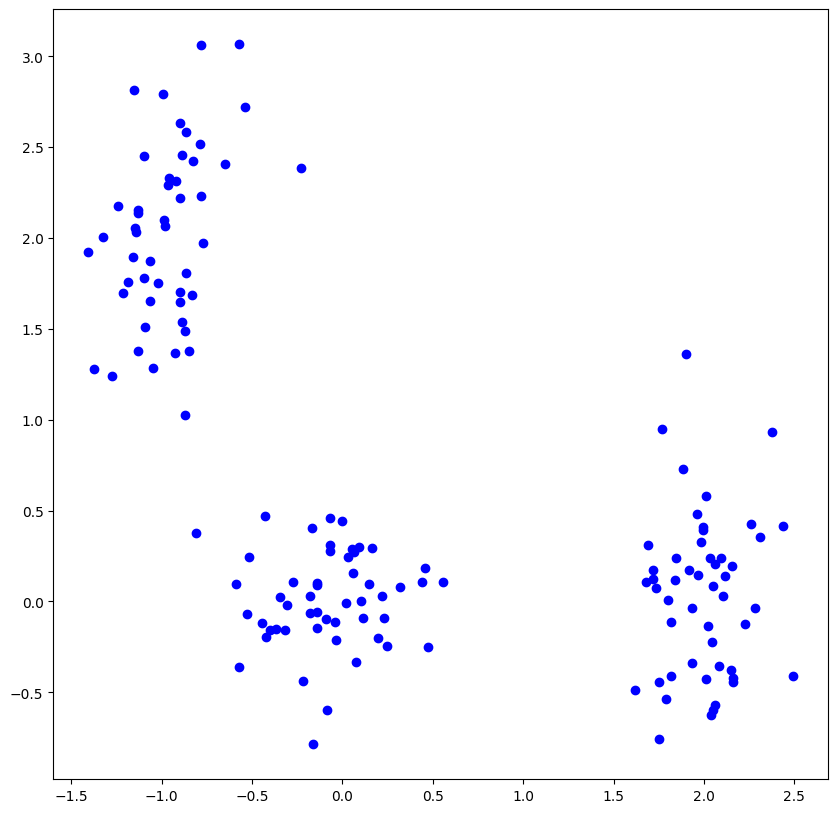

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(X[:,0],X[:,1],'bo')

In [ ]:
np.random.seed(seed=42)
centroids = np.random.normal(loc=0.0,scale=1.,size=6)

In [ ]:
centroids = centroids.reshape((3,2))

In [ ]:
centroids

array([[ 0.49671415, -0.1382643 ],
       [ 0.64768854,  1.52302986],
       [-0.23415337, -0.23413696]])

In [4]:
from scipy.spatial.distance import cdist

In [ ]:
cent_history = []
cent_history.append(centroids)
for i in range(4):
  distances = cdist(X,centroids)

  labels = distances.argmin(axis=1)

  centroids = centroids.copy()
  centroids[0,:] = np.mean(X[labels==0,:],axis=0)
  centroids[1,:] = np.mean(X[labels==1,:],axis=0)
  centroids[2,:] = np.mean(X[labels==2,:],axis=0)
  cent_history.append(centroids)

In [ ]:
cent_history

[array([[ 0.49671415, -0.1382643 ],
        [ 0.64768854,  1.52302986],
        [-0.23415337, -0.23413696]]),
 array([[ 1.63522133, -0.03583727],
        [-0.67092766,  1.96259423],
        [-0.26799038,  0.09012213]]),
 array([[ 1.99214249,  0.04194837],
        [-0.97308382,  2.02226965],
        [-0.08218251,  0.01266822]]),
 array([[ 1.99214249,  0.04194837],
        [-0.97308382,  2.02226965],
        [-0.08218251,  0.01266822]]),
 array([[ 1.99214249,  0.04194837],
        [-0.97308382,  2.02226965],
        [-0.08218251,  0.01266822]])]

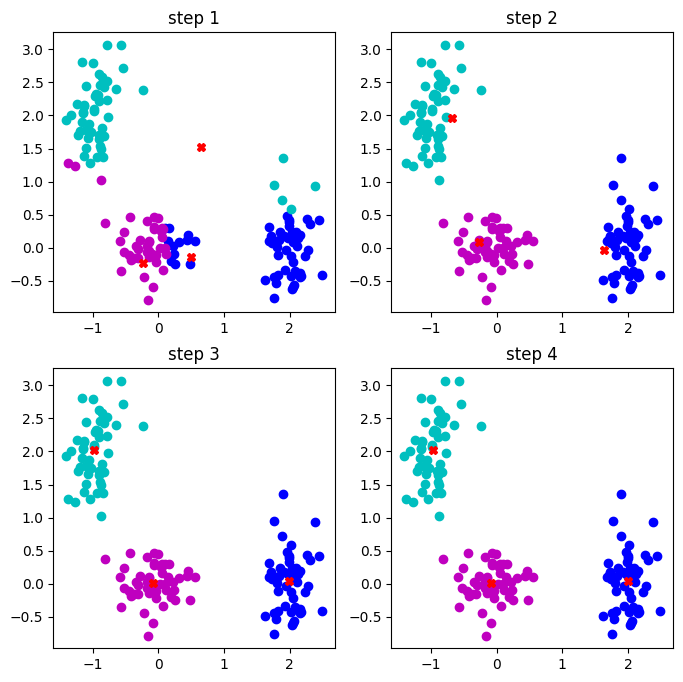

In [ ]:
plt.figure(figsize=(8,8))

for i in range(4):
  distances = cdist(X,cent_history[i])
  labels = distances.argmin(axis=1)

  plt.subplot(2,2,i+1)

  plt.plot(X[labels==0,0],X[labels==0,1],'bo',label='cluster 1')
  plt.plot(X[labels==1,0],X[labels==1,1],'co',label='cluster 2')
  plt.plot(X[labels==2,0],X[labels==2,1],'mo',label='cluster 3')
  plt.plot(cent_history[i][:,0],cent_history[i][:,1],'rX')
  plt.title('step {:}'.format(i+1))

In [5]:
from sklearn.cluster import KMeans

In [ ]:
inertia = []

In [ ]:
for k in range(1,8):
  kmeans=KMeans(n_clusters=k).fit(X)
  inertia.append(np.sqrt(kmeans.inertia_))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

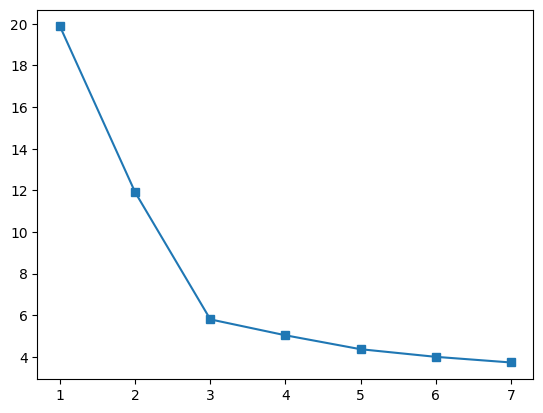

In [ ]:
plt.plot(range(1,8),inertia,marker='s')

In [6]:
from scipy.cluster import hierarchy

In [7]:
from scipy.spatial.distance import pdist

In [ ]:
distance_mat = pdist(X)

In [ ]:
Z = hierarchy.linkage(distance_mat,'single')

{'icoord': [[55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [95.0, 95.0, 105.0, 105.0],
  [125.0, 125.0, 135.0, 135.0],
  [115.0, 115.0, 130.0, 130.0],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [185.0, 185.0, 202.5, 202.5],
  [175.0, 175.0, 193.75, 193.75],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [235.0, 235.0, 252.5, 252.5],
  [275.0, 275.0, 285.0, 285.0],
  [305.0, 305.0, 315.0, 315.0],
  [295.0, 295.0, 310.0, 310.0],
  [325.0, 325.0, 335.0, 335.0],
  [302.5, 302.5, 330.0, 330.0],
  [280.0, 280.0, 316.25, 316.25],
  [365.0, 365.0, 375.0, 375.0],
  [355.0, 355.0, 370.0, 370.0],
  [345.0, 345.0, 362.5, 362.5],
  [298.125, 298.125, 353.75, 353.75],
  [243.75, 243.75, 325.9375, 325.9375],
  [225.0, 225.0, 284.84375, 284.84375],
  [184.375, 184.375, 254.921875, 254.921875],
  [165.0, 165.0, 219.6484375, 219.6484375],
  [395.0, 395.0, 405.0, 405.0],
  [385.0, 385.0, 400.0, 400.0],
  [425.0, 425.0, 435.0, 435.0],
  [415.0, 415.0, 430

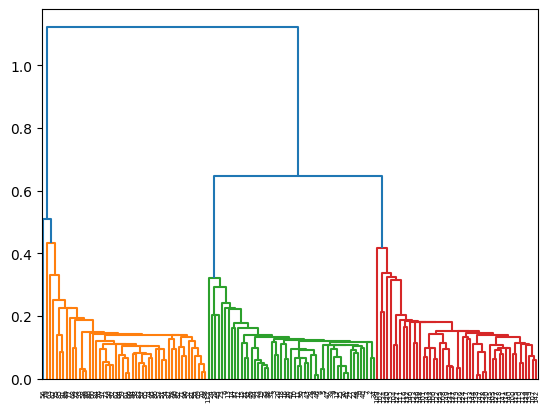

In [ ]:
hierarchy.dendrogram(Z,color_threshold=0.5)

In [8]:
from sklearn.metrics import adjusted_rand_score,adjusted_mutual_info_score,homogeneity_score,completeness_score,v_measure_score

In [9]:
from sklearn import datasets

In [ ]:
data = datasets.load_digits()

In [ ]:
X,y = data.data,data.target

In [ ]:
set(y)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [10]:
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering, DBSCAN, AffinityPropagation

In [ ]:
algoritmi = []

In [ ]:
algoritmi.append(KMeans(n_clusters=10))
algoritmi.append(AgglomerativeClustering(n_clusters=10))
algoritmi.append(SpectralClustering(n_clusters=10,affinity='nearest_neighbors'))
algoritmi.append(DBSCAN())
algoritmi.append(AffinityPropagation())

In [ ]:
data = []

In [ ]:
for algoritam in algoritmi:
  algoritam.fit(X)
  data.append({
      'ARI':adjusted_rand_score(y,algoritam.labels_),
      'AMI':adjusted_mutual_info_score(y,algoritam.labels_),
      'Homogenity':homogeneity_score(y,algoritam.labels_),
      'Completeness':completeness_score(y,algoritam.labels_),
      'V-measure':v_measure_score(y,algoritam.labels_)
  })

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [11]:
import pandas as pd

In [ ]:
pd.DataFrame(data=data,index=['KMeans', 'Agglomerative Clustering', 'Spectral Clustering', 'DBSCAN', 'Affinity Propagation'])

,ARI,AMI,Homogenity,Completeness,V-measure
KMeans,0.666622,0.740907,0.739158,0.747875,0.743491
Agglomerative Clustering,0.794003,0.866832,0.857513,0.879096,0.868170
Spectral Clustering,0.756461,0.852040,0.831691,0.876614,0.853562
DBSCAN,0.000000,0.000000,0.000000,1.000000,0.000000
Affinity Propagation,0.175260,0.612478,0.958910,0.486921,0.645876


# Advanced Clustering: Generate clusters for sentiment analysis of the bitcoin tweets

In [12]:
df = pd.read_csv('/content/drive/MyDrive/DataScience/Auditoriski/data/bitcointweets.csv')

In [13]:
df.columns=['date','text','author','id','unknown','tags','url','sentiment']

In [14]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['seniment'] = encoder.fit_transform(df['sentiment'])

In [15]:
df

,date,text,author,id,unknown,tags,url,sentiment,seniment
0,Fri Mar 23 00:40:34 +0000 2018,@lopp @_Kevin_Pham @psycho_sage @naval But @Pr...,BitMocro,1295,0,[u'Bitcoin'],"<a href=""http://twitter.com/download/android"" ...",['neutral'],1
1,Fri Mar 23 00:40:35 +0000 2018,RT @tippereconomy: Another use case for #block...,hojachotopur,6090,0,"[u'blockchain', u'Tipper', u'TipperEconomy']","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive'],2
2,Fri Mar 23 00:40:36 +0000 2018,free coins https://t.co/DiuoePJdap,denies_distro,2626,0,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive'],2
3,Fri Mar 23 00:40:36 +0000 2018,RT @payvxofficial: WE are happy to announce th...,aditzgraha,184,0,[],"<a href=""http://twitter.com/download/android"" ...",['positive'],2
4,Fri Mar 23 00:40:36 +0000 2018,Copy successful traders automatically with Bit...,VictorS61164810,14,0,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive'],2
...,...,...,...,...,...,...,...,...,...
50853,Fri Mar 23 08:55:16 +0000 2018,RT @fixy_app: Fixy Network brings popular cryp...,quoting_lives,5673,0,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive'],2
50854,Fri Mar 23 08:55:17 +0000 2018,RT @bethereumteam: After a successful launch o...,VariPewitt,372,0,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive'],2
50855,Fri Mar 23 08:55:18 +0000 2018,"RT @GymRewards: Buy #GYMRewards Tokens, Bonus ...",urbancoinerz,557,0,"[u'GYMRewards', u'ICO', u'cryptocurrency', u'm...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['neutral'],1
50856,Fri Mar 23 08:55:19 +0000 2018,I added a video to a @YouTube playlist https:/...,MRDanishShahab,3,0,[],"<a href=""http://www.google.com/"" rel=""nofollow...",['positive'],2


In [16]:
!pip install transformers

In [17]:
import tensorflow_hub as hub

In [18]:
model = hub.load('https://tfhub.dev/google/universal-sentence-encoder/4')

In [19]:
from absl import logging

In [20]:
logging.set_verbosity(logging.ERROR)

In [21]:
def embed(input):
  return model(input)

In [22]:
message_embeddings = embed(df.text.values)

In [23]:
message_embeddings

<tf.Tensor: shape=(50858, 512), dtype=float32, numpy=
array([[-0.00023587, -0.04965301, -0.04544644, ..., -0.00699701,
        -0.0817619 , -0.06738114],
       [-0.00882475, -0.06427665, -0.06390414, ...,  0.05352812,
        -0.06909753, -0.0684047 ],
       [-0.0431166 , -0.07247733, -0.00263125, ..., -0.02413652,
        -0.04707826, -0.0441168 ],
       ...,
       [-0.03637782, -0.07333581, -0.02006671, ...,  0.00748271,
        -0.06006524, -0.06887389],
       [-0.01435385, -0.0501017 ,  0.00692282, ..., -0.01416572,
        -0.07574023, -0.07719906],
       [-0.00828403, -0.08008461, -0.03335601, ..., -0.01549363,
        -0.03189274, -0.02582982]], dtype=float32)>

In [24]:
from sklearn.cluster import KMeans

In [25]:
kmeans = KMeans(n_clusters=3)

In [26]:
kmeans.fit(message_embeddings)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [27]:
clusters = kmeans.labels_.tolist()

In [28]:
#clusters

In [29]:
kmeans.fit_predict(message_embeddings)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 0, 1, ..., 0, 2, 1], dtype=int32)

In [30]:
v_measure_score(df.sentiment.values,clusters)

0.004665519337517612

In [31]:
from sklearn.decomposition import PCA

In [32]:
pca = PCA(2)

In [33]:
data_new = pca.fit_transform(message_embeddings)

In [34]:
data_new

array([[-0.0792291 , -0.22064666],
       [-0.08988627,  0.28964794],
       [ 0.11576383, -0.15084673],
       ...,
       [-0.08275156,  0.35314158],
       [-0.08271584, -0.08990483],
       [ 0.24937298,  0.13524713]])

In [35]:
df_new = pd.concat([pd.DataFrame(clusters,columns=['label']), pd.DataFrame(data_new,columns=['x','y'])],axis=1)

In [36]:
df_new

,label,x,y
0,1,-0.079229,-0.220647
1,0,-0.089886,0.289648
2,2,0.115764,-0.150847
3,2,0.299044,0.155682
4,1,-0.190673,-0.165308
...,...,...,...
50853,0,-0.073368,0.085144
50854,2,0.406713,-0.002731
50855,0,-0.082752,0.353142
50856,1,-0.082716,-0.089905


In [ ]:
for cluster in clusters:
  if(cluster==0):
    plt.scatter(data_new[0],data_new[1],label=0)
  elif cluster==1:
    plt.scatter(data_new[0],data_new[1],label=1)
  else:
    plt.scatter(data_new[0],data_new[1],label=2)

plt.show()

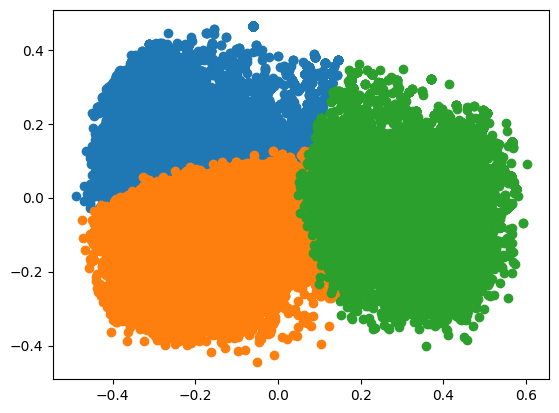

In [38]:
for i in set(clusters):
  plt.scatter(df_new[df_new['label']==i]['x'],df_new[df_new['label']==i]['y'],label=i)

In [39]:
from sklearn.neighbors import kneighbors_graph

In [40]:
con = kneighbors_graph(message_embeddings,n_neighbors=3)

In [41]:
model = AgglomerativeClustering(n_clusters=3,connectivity=con,linkage='ward').fit(message_embeddings)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:282: UserWarning: the number of connected components of the connectivity matrix is 732 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_connected_components = _fix_connectivity(


In [42]:
clusters = model.labels_.tolist()

In [43]:
model.labels_

array([1, 2, 1, ..., 2, 1, 2])

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [46]:
label = model.fit_predict(message_embeddings)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:282: UserWarning: the number of connected components of the connectivity matrix is 732 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_connected_components = _fix_connectivity(


In [47]:
u_labels = np.unique(label)

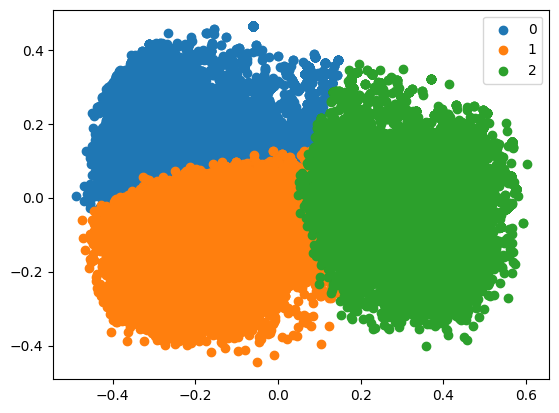

In [50]:
for i in u_labels:
    plt.scatter(df_new[df_new['label']==i]['x'],df_new[df_new['label']==i]['y'],label=i)
plt.legend()
plt.show()

#  Deep Encoding for Categorical Data

In [51]:
df = pd.read_csv('/content/drive/MyDrive/DataScience/Auditoriski/data/bike_sharing_daily.csv')

In [53]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [54]:
df_small = df[['dteday','cnt','mnth']]

In [55]:
df_small = df_small.sort_values(by=['mnth','dteday'])

In [56]:
df_small

,dteday,cnt,mnth
0,2011-01-01,985,1
1,2011-01-02,801,1
2,2011-01-03,1349,1
3,2011-01-04,1562,1
4,2011-01-05,1600,1
...,...,...,...
726,2012-12-27,2114,12
727,2012-12-28,3095,12
728,2012-12-29,1341,12
729,2012-12-30,1796,12


In [57]:
df_2 = df[['dteday','cnt','mnth','yr']]

In [58]:
df_2 = df_2[df_2['yr']==0]

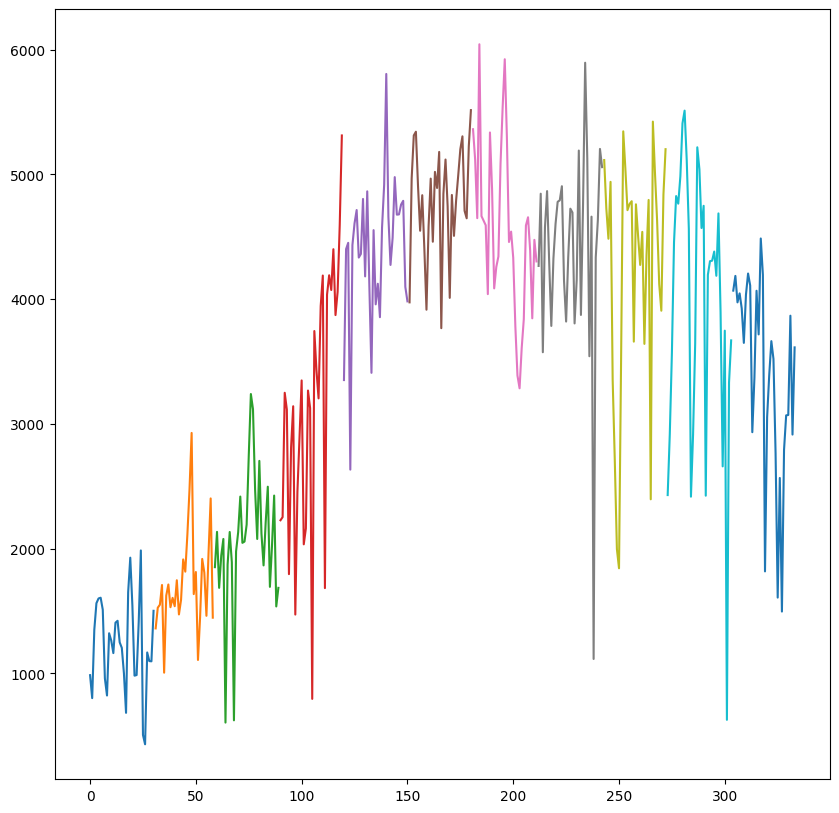

In [60]:
for x in range(1,12):
  df_2[df_2['mnth']==x]['cnt'].plot(figsize=(10,10))

In [61]:
from sklearn.preprocessing import MinMaxScaler

In [62]:
scaler = MinMaxScaler()

In [64]:
df_small['cnt_scale']=scaler.fit_transform(df_small['cnt'].array.reshape((-1,1)))

In [65]:
df_small

,dteday,cnt,mnth,cnt_scale
0,2011-01-01,985,1,0.110792
1,2011-01-02,801,1,0.089623
2,2011-01-03,1349,1,0.152669
3,2011-01-04,1562,1,0.177174
4,2011-01-05,1600,1,0.181546
...,...,...,...,...
726,2012-12-27,2114,12,0.240681
727,2012-12-28,3095,12,0.353543
728,2012-12-29,1341,12,0.151749
729,2012-12-30,1796,12,0.204096


In [67]:
pd.get_dummies(df_small['mnth']).astype(int)

,1,2,3,4,5,6,7,8,9,10,11,12
0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
726,0,0,0,0,0,0,0,0,0,0,0,1
727,0,0,0,0,0,0,0,0,0,0,0,1
728,0,0,0,0,0,0,0,0,0,0,0,1
729,0,0,0,0,0,0,0,0,0,0,0,1


In [68]:
from keras.layers import Dense, Embedding, Flatten

In [69]:
from keras.models import Sequential

In [70]:
model = Sequential()
model.add(Embedding(input_dim=12,output_dim=3,input_length=1,name='embedding'))

In [71]:
model.add(Flatten())

In [72]:
model.add(Dense(50,activation='relu'))

In [73]:
model.add(Dense(15,activation='relu'))

In [74]:
model.add(Dense(1))

In [76]:
model.compile(loss='mse',optimizer='adam')

In [77]:
df_small['mnth'] = df_small['mnth']-1

In [78]:
model.fit(x=df_small['mnth'].values,y=df_small['cnt'].values,epochs=50,batch_size=32)

Epoch 1/50
23/23 [==============================] - 1s 3ms/step - loss: 24036242.0000
Epoch 2/50
23/23 [==============================] - 0s 2ms/step - loss: 24034308.0000
Epoch 3/50
23/23 [==============================] - 0s 2ms/step - loss: 24030384.0000
Epoch 4/50
23/23 [==============================] - 0s 2ms/step - loss: 24022334.0000
Epoch 5/50
23/23 [==============================] - 0s 3ms/step - loss: 24006672.0000
Epoch 6/50
23/23 [==============================] - 0s 2ms/step - loss: 23978508.0000
Epoch 7/50
23/23 [==============================] - 0s 2ms/step - loss: 23933042.0000
Epoch 8/50
23/23 [==============================] - 0s 3ms/step - loss: 23863402.0000
Epoch 9/50
23/23 [==============================] - 0s 2ms/step - loss: 23760674.0000
Epoch 10/50
23/23 [==============================] - 0s 3ms/step - loss: 23616906.0000
Epoch 11/50
23/23 [==============================] - 0s 2ms/step - loss: 23422590.0000
Epoch 12/50
23/23 [==============================] -

In [79]:
layer = model.get_layer('embedding')

In [86]:
embeddings = pd.DataFrame(layer.get_weights()[0])

In [87]:
embeddings = embeddings.reset_index()

In [88]:
embeddings

,index,0,1,2
0,0,0.483577,0.506844,0.492760
1,1,0.669539,0.666557,0.651143
2,2,1.053856,0.964310,0.999499
3,3,1.219059,1.217213,1.200735
4,4,1.370131,1.448801,1.420958
5,5,1.417995,1.504626,1.499654
6,6,1.414676,1.432974,1.436842
7,7,1.418977,1.496791,1.463836
8,8,1.503831,1.407494,1.464683
9,9,1.369179,1.395321,1.327265


In [89]:
embeddings.columns = ['mnth','embedding 1','embedding 2','embedding 3']

Text(0.5, 0, 'Embedding 3')

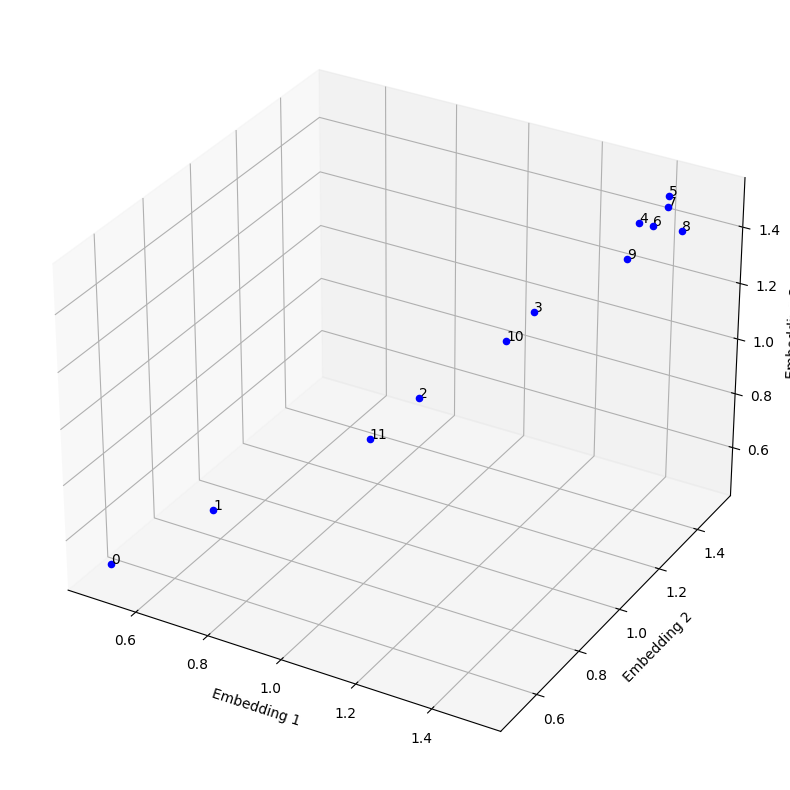

In [96]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111,projection='3d')

vektori = embeddings.iloc[:,1:].to_numpy()
for i in embeddings.mnth.values:
  ax.scatter(vektori[i,0],vektori[i,1],vektori[i,2],color='b')
  ax.text(vektori[i,0],vektori[i,1],vektori[i,2],'%s'%(str(embeddings.mnth.values[i])))

ax.set_xlabel('Embedding 1')
ax.set_ylabel('Embedding 2')
ax.set_zlabel('Embedding 3')